<a href="https://colab.research.google.com/github/swapnilxi/a-computer-vision/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#    Object Tracking
## Template Tracking


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
full = cv2.imread('/content/drive/My Drive/Colab Notebooks/ComputerVision/ImageData/testImg.jpg')
type(full)


numpy.ndarray

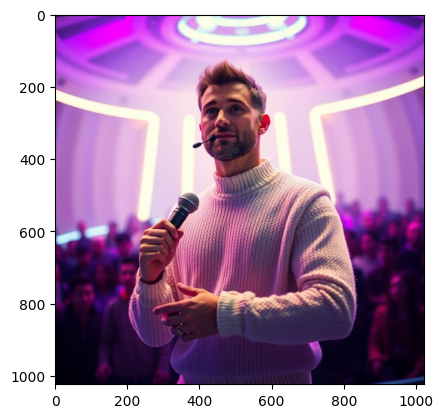

In [ ]:
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [ ]:
full.shape

(1024, 1024, 3)

## Reading the face image to compare with original

In [ ]:
face = cv2.imread('/content/drive/My Drive/Colab Notebooks/ComputerVision/ImageData/faceTest.jpg')
type(face)

numpy.ndarray

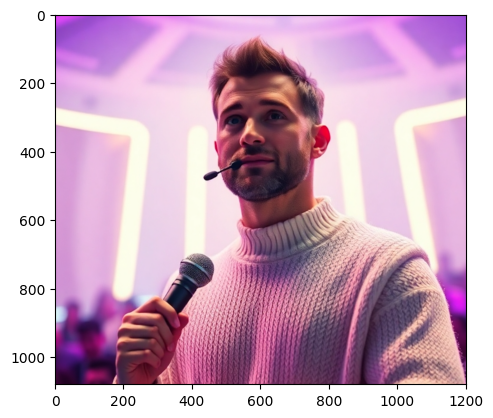

In [ ]:
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [ ]:
face.shape

(1080, 1202, 3)

Face is the part of the main image, because we are doing template matching and this template matching

eval in python can transform string into function

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
my_method= eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)

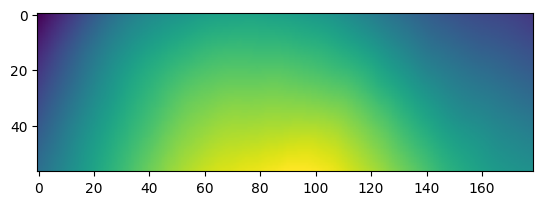

In [ ]:
plt.imshow(res)

This is just the heat map, we are going to grab the value of heatmap and draw a rectangle around that

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
  full_copy= full.copy()
  method= eval(m)

  #Template matching
  res = cv2.matchTemplate(full_copy, face, method)

  #Grabbing the minimum and maximum value, MinMaxLoc return a tuple
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)



we are using like this because in Square Difference values = TM_SQDiff and CV2.TM_SQDIFF_Normed, top_left value is min_loc, in other methods it is other wise

IndentationError: unexpected indent (<ipython-input-23-378d5d50004d>, line 2)

In [ ]:
  #Drawing the rectangle
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc #(y,x)
  else:
    top_left = max_loc


# as face.shape has values like this (1080, 1202, 3)
height,width,channels = face.shape

bottom_right = (top_left[0] + width, top_left[1] + height)

cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 5)

array([[[ 39,  15,  75],
        [ 37,  13,  73],
        [ 39,  13,  76],
        ...,
        [125,  46, 171],
        [124,  49, 167],
        [125,  51, 164]],

       [[ 34,  10,  70],
        [ 38,  14,  74],
        [ 40,  14,  75],
        ...,
        [122,  43, 170],
        [124,  46, 168],
        [122,  44, 163]],

       [[ 38,  13,  71],
        [ 40,  15,  73],
        [ 40,  15,  73],
        ...,
        [125,  43, 177],
        [126,  43, 175],
        [125,  42, 172]],

       ...,

       [[  1,   0,   8],
        [  2,   1,   9],
        [  1,   1,  11],
        ...,
        [ 13,   7,  33],
        [ 12,   6,  34],
        [ 11,   5,  33]],

       [[  0,   0,   9],
        [  2,   0,  11],
        [  0,   0,  10],
        ...,
        [ 12,   8,  31],
        [ 10,   6,  31],
        [ 12,   8,  35]],

       [[  3,   1,  12],
        [  2,   0,  11],
        [  1,   1,  11],
        ...,
        [ 11,   7,  30],
        [ 11,   7,  32],
        [ 12,   8,  35]]

### Subplot
plt.subplot(121) is shorthand for plt.subplot(1, 2, 1) in Matplotlib. It creates a grid with 1 row and 2 columns of subplots and selects the first (leftmost) subplot for plotting.


- 1 (nrows): This indicates that there will be 1 row of plots in the grid.
- 2 (ncols): This indicates that there will be 2 columns of plots in the grid.
- 1 (index): This indicates that we are selecting the first (leftmost) subplot in the grid to work with.

In [ ]:
# Plot and Show Images